# Análisis de Componentes Principales (PCA) y VaR

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

In [2]:
stocks = pd.read_excel('industrias_sp500_precios.xlsx')

In [3]:
stocks.head()

,Date,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
0,2020-01-02,84.371017,28.982893,151.931396,73.683563,78.725609,81.561249,168.809998,83.297447,201.554749,...,142.405029,57.911705,59.971912,55.419270,77.266037,97.172615,141.870209,259.140015,48.343182,131.958664
1,2020-01-03,83.016380,27.548195,151.940918,72.967209,77.978348,80.535507,166.820007,82.281960,201.219009,...,140.292755,58.190208,59.489777,54.805988,77.720833,96.868279,141.499344,256.049988,47.660999,131.978363
2,2020-01-06,83.261787,27.219410,149.443817,73.548622,78.593742,81.714622,179.039993,82.713058,199.905060,...,140.015091,58.106655,59.946552,55.107765,77.217659,96.811203,140.681610,258.010010,47.080219,130.965118
3,2020-01-07,83.517014,27.119778,147.671112,73.202736,78.145378,81.129845,180.350006,82.253235,195.589096,...,140.679504,57.985970,59.455948,55.399803,76.927361,96.982399,140.557968,256.470001,46.794437,131.407791
4,2020-01-08,84.341568,27.737495,145.974609,74.380287,78.699226,81.915939,178.690002,82.588531,195.972778,...,141.562103,57.930271,58.559330,55.983879,77.188622,97.153595,142.241058,247.639999,47.255371,131.122513


In [4]:
stocks.tail()

,Date,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
697,2022-10-07,127.440002,12.18,161.320007,140.089996,138.759995,137.350006,257.089996,101.790001,258.560181,...,73.089996,59.860001,101.029999,28.41,89.269997,108.930000,108.260002,266.679993,50.369999,147.369995
698,2022-10-10,125.949997,12.05,166.250000,140.419998,138.309998,137.619995,247.029999,101.129997,256.708435,...,64.139999,60.209999,98.839996,28.08,88.820000,107.790001,106.940002,258.600006,49.950001,145.779999
699,2022-10-11,125.639999,12.26,168.860001,138.979996,141.509995,141.710007,243.139999,101.750000,251.859985,...,59.639999,59.830002,98.000000,28.16,89.050003,105.250000,108.320000,250.009995,49.180000,146.250000
700,2022-10-12,125.690002,12.70,169.320007,138.339996,139.979996,138.940002,242.770004,100.080002,250.070007,...,58.709999,57.939999,98.430000,28.02,87.220001,105.540001,107.059998,261.029999,48.439999,145.860001
701,2022-10-13,127.900002,13.05,171.580002,142.990005,142.919998,142.050003,258.079987,102.470001,257.459991,...,57.099998,59.740002,101.870003,29.00,88.339996,109.680000,109.430000,268.269989,50.570000,148.639999


In [5]:
stocks.set_index('Date', inplace=True)

Según como explica Fama (1965), el rendimiento de la variación en el precio de un activo no sigue una distribucion normal, ya que no es simetrica. Esto significa  que la distribución tiene una Kurtosis alta. Por esto necesitamos aplicar el logaritmo de los rendimientos que permite convertir los mismos en una distribución simetrica.

In [6]:
rendimientos = stocks.apply(np.log).diff(1) 

<AxesSubplot:title={'center':'Rendimientos Diarios Portafolio'}, xlabel='Date'>

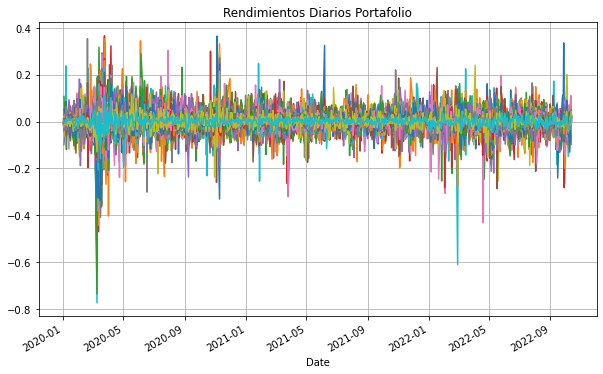

In [7]:
rendimientos.plot(figsize=(10,6), grid=True,title='Rendimientos Diarios Portafolio',legend=False)

<AxesSubplot:title={'center':'Rendimientos Acumulados Portafolio'}, xlabel='Date'>

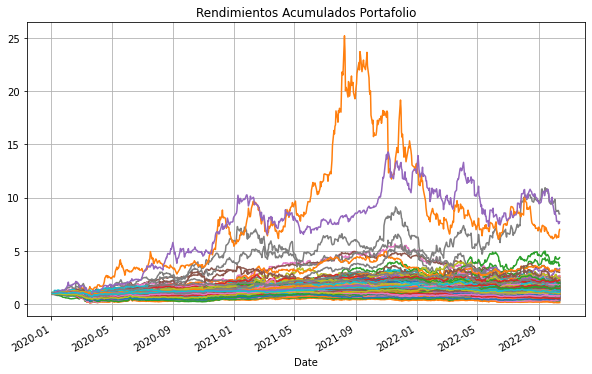

In [8]:
rendimientos_acumulados = rendimientos.cumsum().apply(np.exp)
rendimientos_acumulados.plot(figsize=(10,6), grid=True, title='Rendimientos Acumulados Portafolio',legend=False)

<AxesSubplot:title={'center':'Primer Componente principal of the S&P500'}>

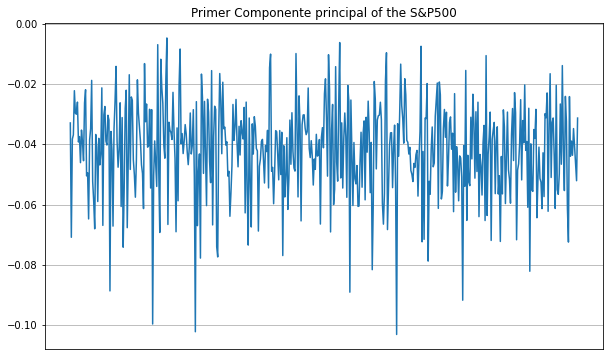

In [9]:
pca = PCA(1).fit(rendimientos.fillna(0))
pc1 = pd.Series(index=rendimientos.columns, data=pca.components_[0])
pc1.plot(figsize=(10,6), xticks=[], grid=True,  title='Primer Componente principal of the S&P500')

In [10]:
#pesos: componente principal de cada variable.. se calcula el % que representa de todo el componente principal
pesos = abs(pc1)/sum(abs(pc1))

In [11]:
#mis rendimientos son el % de cada stock como parte de su componente principal multiplicado por los rendimientos de cada dia
mis_rs = (pesos*rendimientos).sum(1)

<AxesSubplot:xlabel='Date'>

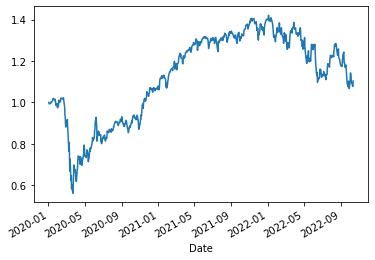

In [12]:
mis_rs.cumsum().apply(np.exp).plot()

In [13]:
sp500 = pd.read_excel('sp500.xlsx')
sp500.set_index('Date',inplace=True)

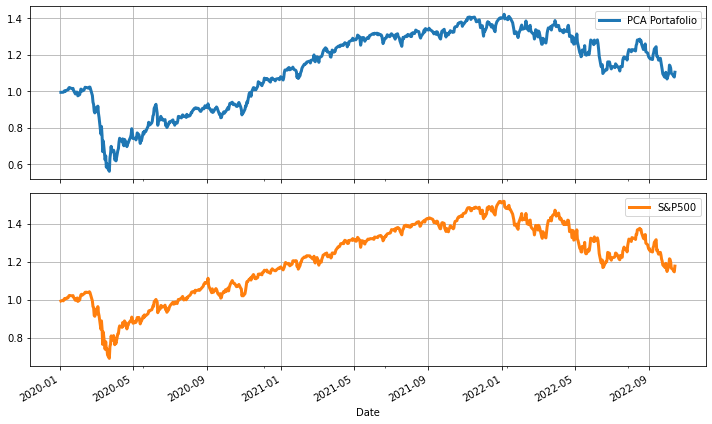

In [14]:
rs_df = pd.concat([mis_rs, sp500.apply(np.log).diff(1).dropna()], 1)

rs_df.columns = ["PCA Portafolio", "S&P500"]

rs_df.dropna().cumsum().apply(np.exp).plot(subplots=True, figsize=(10,6), grid=True, linewidth=3)

plt.tight_layout()

In [15]:
sum(abs(pc1))

20.92933936430099

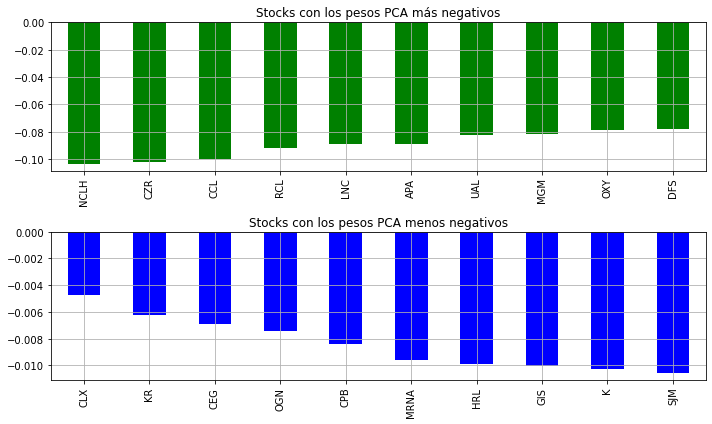

In [16]:
fig, ax = plt.subplots(2,1, figsize=(10,6))

pc1.nsmallest(10).plot.bar(ax=ax[0], color='green', grid=True, title='Stocks con los pesos PCA más negativos')

pc1.nlargest(10).plot.bar(ax=ax[1], color='blue', grid=True, title='Stocks con los pesos PCA menos negativos')

plt.tight_layout()

In [17]:
mis_rs_pca_pos = rendimientos[pc1.nlargest(10).index].mean(1)
mis_rs_pca_neg = rendimientos[pc1.nsmallest(10).index].mean(1)

In [18]:
mis_rs_pca_df_pos = pd.DataFrame(mis_rs_pca_pos.cumsum().apply(np.exp))
mis_rs_pca_df_neg = pd.DataFrame(mis_rs_pca_neg.cumsum().apply(np.exp))
mis_rs_pca_df_pos.columns = ['PCA_Portafolio_Positivos']
mis_rs_pca_df_neg.columns = ['PCA_Portafolio_Negativos']

In [19]:
sp500_df_rendimientos_acumulados = sp500.apply(np.log).diff(1).cumsum().apply(np.exp)
sp500_df_rendimientos_acumulados.columns = ['S&P_500']

In [20]:
df_ = pd.concat([mis_rs_pca_df_pos,mis_rs_pca_df_neg,sp500_df_rendimientos_acumulados],axis=1)

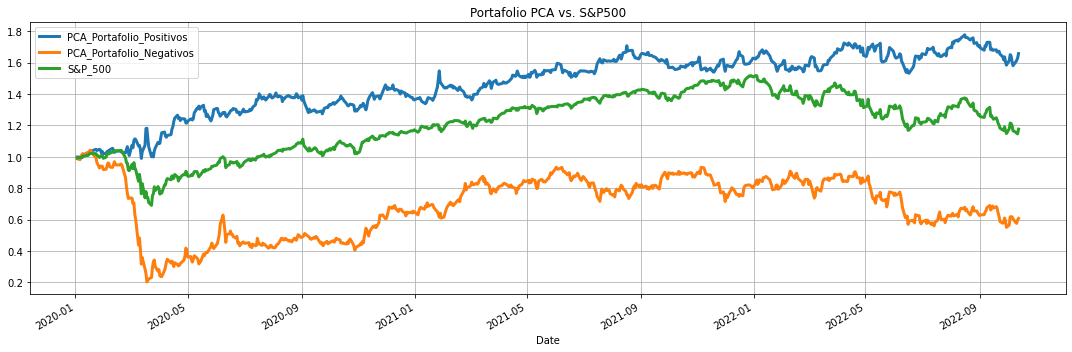

In [21]:
df_.plot(figsize=(15,5), grid=True, linewidth=3, title='Portafolio PCA vs. S&P500')
plt.tight_layout()

In [22]:
stocks_detalles = pd.read_excel('industrias_sp500_detalle.xlsx')

In [23]:
stocks_detalles = stocks_detalles.drop(stocks_detalles.columns[0], axis=1)

In [24]:
stocks_detalles.head()

,Symbol,Security,SEC filings,GICS Sector,GICS Sub-Industry,Headquarters Location,Date first added,CIK,Founded
0,MMM,3M,reports,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1976-08-09,66740,1902
1,AOS,A. O. Smith,reports,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800,1888
3,ABBV,AbbVie,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ABMD,Abiomed,reports,Health Care,Health Care Equipment,"Danvers, Massachusetts",2018-05-31,815094,1981


In [25]:
print('Compañias')
stocks_detalles[stocks_detalles['Symbol'].isin(list(pc1.nlargest(10).index))]

Compañias


,Symbol,Security,SEC filings,GICS Sector,GICS Sub-Industry,Headquarters Location,Date first added,CIK,Founded
85,CPB,Campbell Soup Company,reports,Consumer Staples,Packaged Foods & Meats,"Camden, New Jersey",1957-03-04,16732,1869
114,CLX,Clorox,reports,Consumer Staples,Household Products,"Oakland, California",1969-03-31,21076,1913
126,CEG,Constellation Energy,reports,Utilities,Multi-Utilities,"Baltimore, Maryland",2022-02-02,1868275,1999
216,GIS,General Mills,reports,Consumer Staples,Packaged Foods & Meats,"Golden Valley, Minnesota",1969-03-31,40704,1856
236,HRL,Hormel Foods,reports,Consumer Staples,Packaged Foods & Meats,"Austin, Minnesota",2009-03-04,48465,1891
268,K,Kellogg's,reports,Consumer Staples,Packaged Foods & Meats,"Battle Creek, Michigan",1989-09-11,55067,1906
277,KR,Kroger,reports,Consumer Staples,Food Retail,"Cincinnati, Ohio",1957-03-04,56873,1883
317,MRNA,Moderna,reports,Health Care,Biotechnology,"Cambridge, Massachusetts",2021-07-21,1682852,2010
357,OGN,Organon & Co.,reports,Health Care,Pharmaceuticals,"Jersey City, New Jersey",2021-06-03,1821825,2021
419,SJM,The J.M. Smucker Company,reports,Consumer Staples,Packaged Foods & Meats,"Orrville, Ohio",2008-11-06,91419,1897


In [26]:
stocks_detalles[stocks_detalles['Symbol'].isin(list(pc1.nsmallest(10).index))]

,Symbol,Security,SEC filings,GICS Sector,GICS Sub-Industry,Headquarters Location,Date first added,CIK,Founded
44,APA,APA Corporation,reports,Energy,Oil & Gas Exploration & Production,"Houston, Texas",1997-07-28,1841666,1954
83,CZR,Caesars Entertainment,reports,Consumer Discretionary,Casinos & Gaming,"Reno, Nevada",2021-03-22,1590895,1973
89,CCL,Carnival,reports,Consumer Discretionary,"Hotels, Resorts & Cruise Lines","Miami, Florida",1998-12-22,815097,1972
149,DFS,Discover Financial,reports,Financials,Consumer Finance,"Riverwoods, Illinois",2007-07-02,1393612,1985
285,LNC,Lincoln Financial,reports,Financials,Multi-line Insurance,"Radnor, Pennsylvania",1976-06-30,59558,1905
312,MGM,MGM Resorts,reports,Consumer Discretionary,Casinos & Gaming,"Paradise, Nevada",2017-07-26,789570,1986
344,NCLH,Norwegian Cruise Line Holdings,reports,Consumer Discretionary,"Hotels, Resorts & Cruise Lines","Miami, Florida",2017-10-13,1513761,2011 (1966)
351,OXY,Occidental Petroleum,reports,Energy,Oil & Gas Exploration & Production,"Houston, Texas",1982-12-31,797468,1920
406,RCL,Royal Caribbean Group,reports,Consumer Discretionary,"Hotels, Resorts & Cruise Lines","Miami, Florida",2014-12-05,884887,1997
461,UAL,United Airlines Holdings,reports,Industrials,Airlines,"Chicago, Illinois",2015-09-03,100517,1967


# Calculemos el VaR del S&P 500

In [27]:
inversion_inicial = 1e6
nivel_conf = 0.95

In [28]:
stocks_rendimientos_todo = stocks.apply(np.log).diff(1)

In [29]:
perc_95 = np.percentile(stocks_rendimientos_todo.dropna(), 1-nivel_conf)

In [30]:
VaR_MC = (inversion_inicial - inversion_inicial * (1 + perc_95))
print("Con un 95% de confianza nuestra cartera de 1M USD no superará pérdidas mayores a {:,.2f} ".format(VaR_MC))

Con un 95% de confianza nuestra cartera de 1M USD no superará pérdidas mayores a 150,168.67 


# Calculemos el VaR de las acciones PCA

In [31]:
stocks_pca = stocks[list(pc1.nlargest(10).index)]

In [32]:
stocks_pca_rendimientos= stocks_pca.apply(np.log).diff(1)

In [33]:
perc_95 = np.percentile(stocks_pca_rendimientos.dropna(), 1-nivel_conf)

In [34]:
VaR_MC = (inversion_inicial - inversion_inicial * (1 + perc_95))
print("Con un 95% de confianza nuestra cartera de 1M USD no superará pérdidas mayores a {:,.2f} ".format(VaR_MC))

Con un 95% de confianza nuestra cartera de 1M USD no superará pérdidas mayores a 126,680.74 


# Fin